In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import cv2
from os import path, getcwd, chdir
from PIL import Image
import PIL
from mlxtend.data import loadlocal_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [0]:
model = tf.keras.Sequential(
       [tf.keras.layers.Conv2D(32,3,activation = 'relu',input_shape = (28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64,3,activation = 'relu',padding='valid'),
        tf.keras.layers.Conv2D(128,3,activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation = tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation = tf.nn.softmax)]
)



In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [0]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [0]:
def load_img(img_path):  #function to load any image for predictions
  img5 = Image.open(img_path).convert('L')
  np_5 = np.asarray(img5)
  img5 = img5.resize((28,28))
  np_5 = np.array(img5)
  np_5 = 255 -np_5
  for i in range(28):
    for j in range(28):
      if np_5[i,j] < 255/2:
        np_5[i,j] = 0
      else:
       np_5[i,j]-=50
  np_5 = np_5.reshape(1,28,28,1)
  return np_5       
#print(np_5)

In [0]:
x,y = loadlocal_mnist(
        images_path='/content/train-images.idx3-ubyte', 
        labels_path='/content/train-labels.idx1-ubyte')

In [0]:
x_val,y_val = loadlocal_mnist(
        images_path='/content/t10k-images.idx3-ubyte', 
        labels_path='/content/t10k-labels.idx1-ubyte')

In [0]:
yv = y_val[0:5000]   #Validation set
xv = mk_data(x_val[0:5000])

In [0]:
xt = mk_data(x_val[5000:10000]) #Test set
yt = y_val[5000:10000]

In [0]:
print(x.shape)

(60000, 784)


In [0]:
def mk_data(dig_x): #Function to make data model compatible
 dig_img_np = np.zeros(shape = [dig_x.shape[0],28,28,1]) 
 for i in range(dig_x.shape[0]):
   a = dig_x[i]
   a = a.reshape([28,28])
   dig_img_np[i,:,:,0] = a/255.0
 return dig_img_np

(60000, 28, 28, 1)


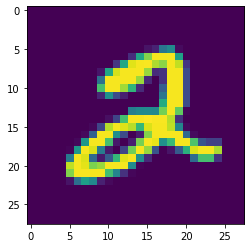

In [48]:
xtrain = mk_data(x)
print(xtrain.shape)
plt.imshow(xtrain[5,:,:,0])

In [0]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1, 
                            rotation_range=10)  
dataGen.fit(xtrain)

In [40]:
dig_det = model.fit(dataGen.flow(xtrain,y,batch_size=56), epochs = 5,validation_data = (xv,yv), verbose = 2)

Epoch 1/5
1072/1072 - 119s - loss: 0.2591 - accuracy: 0.9180 - val_loss: 17.8713 - val_accuracy: 0.9618
Epoch 2/5
1072/1072 - 119s - loss: 0.0960 - accuracy: 0.9719 - val_loss: 9.7846 - val_accuracy: 0.9802
Epoch 3/5
1072/1072 - 117s - loss: 0.0730 - accuracy: 0.9780 - val_loss: 5.3798 - val_accuracy: 0.9906
Epoch 4/5
1072/1072 - 117s - loss: 0.0606 - accuracy: 0.9812 - val_loss: 12.0411 - val_accuracy: 0.9784
Epoch 5/5
1072/1072 - 117s - loss: 0.0547 - accuracy: 0.9832 - val_loss: 5.1321 - val_accuracy: 0.9878


In [0]:
print(x_test.shape)

In [0]:
x_test = x_test.reshape((10000,28,28,1))

In [41]:
print(dig_det)
acc = dig_det.history['accuracy']
val_acc = dig_det.history['val_accuracy']
loss = dig_det.history['loss']
val_loss = dig_det.history['val_loss']

epochs = range(len(acc))

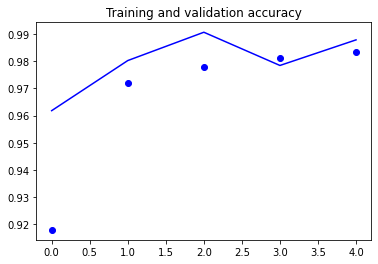

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.show()

In [43]:
loss,acc = model.evaluate(xt,yt)

print(loss)
print(acc*100)

157/157 [==============================] - 3s 17ms/step - loss: 2.2488 - accuracy: 0.9938
2.2488155364990234
99.37999844551086


In [0]:
model.save('dig_detv2.h5')

In [51]:
model = tf.keras.models.load_model('/content/dig_detv2.h5')
loss,acc = model.evaluate(xt,yt)

print(loss)
print(acc*100)

157/157 [==============================] - 3s 16ms/step - loss: 2.2488 - accuracy: 0.9938
2.2488155364990234
99.37999844551086


In [0]:
#Making predictions
img_path = #path of the image you wanna load.
print(np.argmax((model.predict(load_img(img_path)))))